In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-1-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


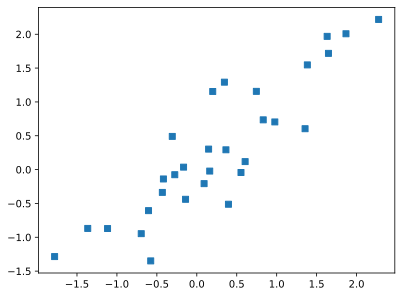

In [ ]:
N = 30
x= torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')

In [ ]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
learningRate = .05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(),lr= learningRate)


In [ ]:
numepochs = 500
losses = torch.zeros(numepochs)

In [ ]:
for epochi in range(numepochs):
  yHat = ANNreg(x)
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 1.0, 'Final Loss = 0.200802')

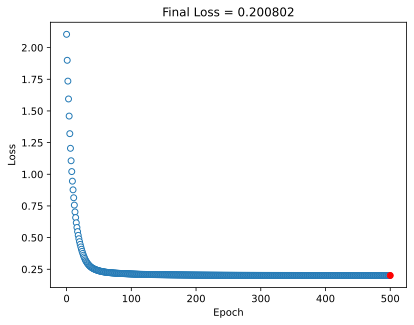

In [ ]:
predictions = ANNreg(x)

testloss = (predictions- y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %g' %testloss.item())


In [ ]:
testloss

tensor(0.2008, grad_fn=<MeanBackward0>)

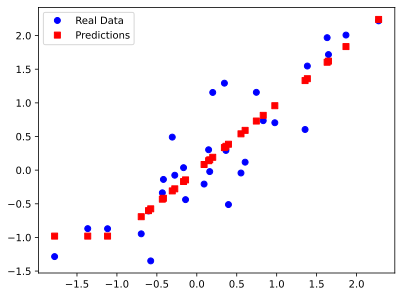

In [ ]:
plt.plot(x,y,'bo',label = 'Real Data')
plt.plot(x,predictions.detach(),'rs',label= 'Predictions')
plt.legend()